# Model Training

### Connect to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install dependencies

In [2]:
!pip install opencv-python-headless numpy matplotlib

### Dataset Preparation

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split

def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (64, 64))  # Resize to 64x64 for CNN input
    img = img / 255.0  # Normalize pixel values (0 to 1)
    return img

def load_data(dataset_path):
    images = []
    labels = []

    image_files = sorted([os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.jpg')])

    for img_path in image_files:
        img = cv2.imread(img_path)
        img = preprocess_image(img)
        images.append(img)

        labels.append(1)

    return np.array(images), np.array(labels)

dataset_path = '/content/drive/My Drive/Lane-Detection-System/images/'
# images, labels = load_data(dataset_path)

### Normalize images and split dataset

In [4]:
X, y = load_data(dataset_path)

X = X[..., np.newaxis]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


def create_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(3, activation='softmax')  # Output: left, center, right
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Training

In [5]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=32
)


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9609 - loss: 0.0655 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
135/135 ━━━━━━━━━━━━

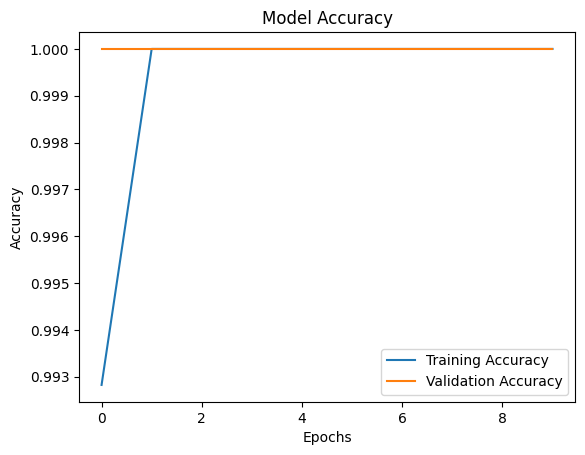

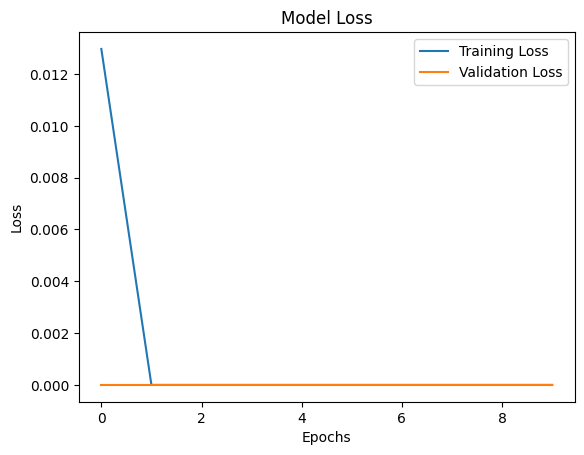

In [6]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


### Evaluate the Model

In [8]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.2f}, Validation Loss: {val_loss:.2f}")

model.save('/content/drive/My Drive/Lane-Detection-System/lane_detection_model.keras')


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 1.00, Validation Loss: 0.00


### Save the Best Model

In [9]:
# Convert the model to TensorFlow Lite
converter = tf.keras.models.load_model('/content/drive/My Drive/Lane-Detection-System/lane_detection_model.keras')
tflite_model = tf.lite.TFLiteConverter.from_keras_model(converter)
tf_lite_model_converted = tflite_model.convert()

# Save the TFLite model
with open('/content/drive/My Drive/Lane-Detection-System/lane_detection_model.tflite', 'wb') as f:
    f.write(tf_lite_model_converted)


Saved artifact at '/tmp/tmpw24z49v5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132681463441264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132684978897136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132682013676416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132684782591088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132682010736272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132682010728176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132681463278128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132682011897072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132682011893728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132682013951424: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Load and Re-Evaluate the Saved Model

In [12]:
interpreter = tf.lite.Interpreter(model_path='/content/drive/My Drive/Lane-Detection-System/lane_detection_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

test_image = X_val[0:1]
test_image = test_image.astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], test_image)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print("Model Output:", output_data)


Model Output: [[3.0528213e-37 1.0000000e+00 0.0000000e+00]]


### Visualizing prediction on the Input Image

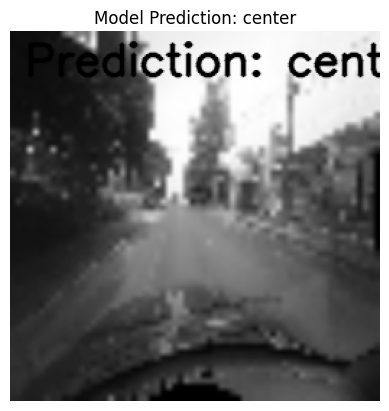

In [13]:
import matplotlib.pyplot as plt
import cv2

class_labels = ['left', 'center', 'right']

test_image = X_val[0:1]  # Take the first validation sample
original_image = X_val[0]  # Keep the original for visualization
test_image = test_image.astype(np.float32)  # Convert to FLOAT32

interpreter.set_tensor(input_details[0]['index'], test_image)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

predicted_class = np.argmax(output_data)
predicted_label = class_labels[predicted_class]

# Overlay prediction on the image
original_image = (original_image * 255).astype('uint8')  # Rescale if normalized
resized_image = cv2.resize(original_image, (256, 256))  # Resize for better visibility

# Add text to the image
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 255, 0)  # Green for prediction text
cv2.putText(resized_image, f'Prediction: {predicted_label}', (10, 30), font, 1, color, 2, cv2.LINE_AA)

# Display the image
plt.imshow(resized_image, cmap='gray')
plt.title(f'Model Prediction: {predicted_label}')
plt.axis('off')
plt.show()


### Evaluating the Model

In [14]:
# Initialize variables for accuracy
correct_predictions = 0
total_samples = len(X_val)

# Loop through the validation set
for i in range(total_samples):
    test_image = X_val[i:i+1].astype(np.float32)  # Take one sample, convert to FLOAT32
    true_label = y_val[i]  # Ground truth label

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], test_image)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Predicted class
    predicted_class = np.argmax(output_data)

    # Check if prediction matches the ground truth
    if predicted_class == true_label:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Validation Accuracy: 100.00%


### Visualize Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


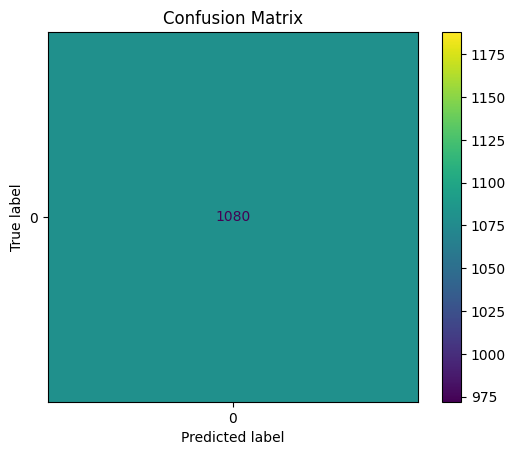

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize variables for predictions and labels
y_true = []
y_pred = []

# Loop through the validation set
for i in range(total_samples):
    test_image = X_val[i:i+1].astype(np.float32)
    true_label = y_val[i]

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], test_image)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Store true label and predicted class
    y_true.append(true_label)
    y_pred.append(np.argmax(output_data))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


### Visualize Class-wise Performance

In [19]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1080

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080

